# Statisticka analiza zaposlenih u HR-u 

Izvor: https://www.kaggle.com/itssuru/hr-employee-attrition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as sm
from scipy import stats
from statsmodels.formula.api import ols

### Ucitavanje svih podataka

In [2]:
# Učitavanje i ispis prvih 5 redova
data = pd.read_csv("HR-Employee-Attrition.csv") 
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Ucitavanje podataka koji su potrebni za statisticku analizu

In [3]:
atributes = ['Age','DistanceFromHome','Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany']
data = pd.read_csv("HR-Employee-Attrition.csv",usecols=atributes)
data

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany
0,41,1,2,1,2,Female,2,5993,19479,8,8,0,6
1,49,8,1,2,3,Male,2,5130,24907,1,10,3,10
2,37,2,2,4,4,Male,1,2090,2396,6,7,3,0
3,33,3,4,5,4,Female,1,2909,23159,1,8,3,8
4,27,2,1,7,1,Male,1,3468,16632,9,6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,2061,3,Male,2,2571,12290,4,17,3,5
1466,39,6,1,2062,4,Male,3,9991,21457,4,9,5,7
1467,27,4,3,2064,2,Male,2,6142,5174,1,6,0,6
1468,49,2,3,2065,4,Male,2,5390,13243,2,17,3,9


### Graficki prikaz koliko radnika ima koji stepen edukacije

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


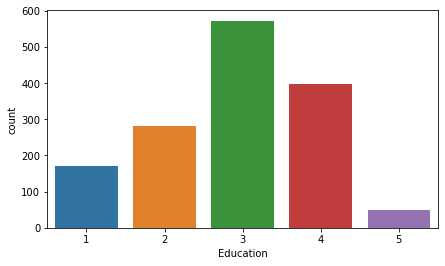

In [4]:
print(data['Education'].value_counts())

plt.figure(figsize=(7,4))
sns.countplot('Education', data=data)

### Raspodela zaposlenih po broju kompanija za koje su ranije radili i ukupnom broju godina koliko rade

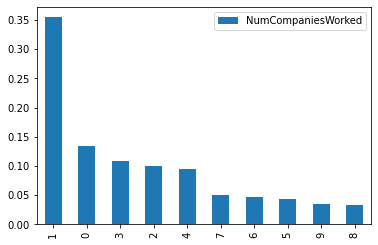

In [5]:
# po broju kompanija za koje su radilil 
data_temp = (data["NumCompaniesWorked"].value_counts()[:20])
Name = pd.DataFrame(data_temp/data_temp.sum())
Name.columns=["NumCompaniesWorked"]
Name.plot.bar()
plt.show()

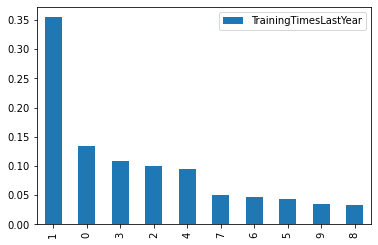

In [6]:
# po ukupnom broju radnih godina
Stars = pd.DataFrame(data_temp/data_temp.sum())
Stars.columns=["TrainingTimesLastYear"]
Stars.plot.bar()
plt.show()

### Graficki prikaz broja po nivou posla zaposlenih koji u kompaniji rade duze od 5 godina

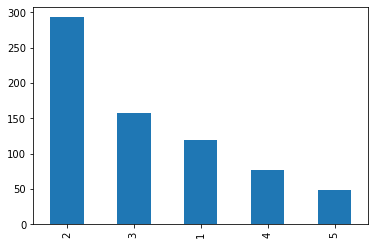

In [7]:
data_temp1 = data.loc[data["YearsAtCompany"]>5,"JobLevel"]
data_temp1=data_temp1.value_counts()
data_temp1.plot.bar()
plt.show()

In [8]:
# broj zaposlenih sa odredjenim nivoom posla
data_temp1 = data["JobLevel"].value_counts() 
data_temp1

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [9]:
# prebrojava zaposlene na odrejdenom nivou koji su duze od 5 godina u kompaniji
data_temp = data.loc[data["YearsAtCompany"]>5,"JobLevel"]  
data_temp=data_temp.value_counts()
data_temp

2    293
3    157
1    119
4     77
5     48
Name: JobLevel, dtype: int64

### Uslovna verovatnoca
Posmatramo dva slučajna dog. A i B. Ako je poznato da jgjpse jedan od njih ostvario, treba odrediti verovatnoću da se ostvario i drugi

In [10]:
data_temp1 = data["JobLevel"].value_counts()

P_Uslovna_Verovatnoca = pd.DataFrame(data_temp/data_temp1)
P_Uslovna_Verovatnoca.columns = ["Uslovna Verovatnoca"]
P_Uslovna_Verovatnoca

,Uslovna Verovatnoca
1,0.219153
2,0.548689
3,0.720183
4,0.726415
5,0.695652


### Iscrtavanje histograma

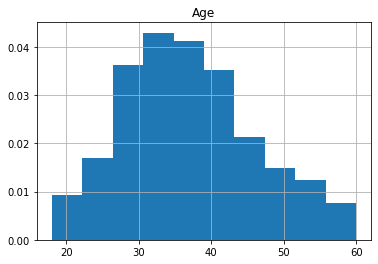

In [11]:
#Prikaz histograma 
# nacin na koji cu prikazati podatke, koristi se za podatke koji su rayliciti na osnovu histograma se prave skale

atributes = ['Age']
df = pd.read_csv("HR-Employee-Attrition.csv",usecols=atributes)

hist = df.hist(density=True,bins=10) 
plt.show()

### Iscrtvaanje gausove krivve

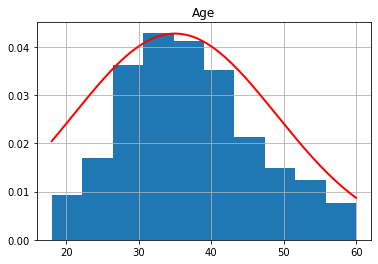

In [12]:
from scipy.stats import norm

hist = df.hist(density=True,bins=10)

step=0.03 # da bi bila sto zobljenija
x = np.arange(18, 60, step)
m=35
sig=14
P_norm= norm.pdf(x, m, sig)

plt.plot(x, P_norm*1.5, 'r', linewidth=2.0)
plt.show()

### Prikaz broja zaposlenih koji imaju visok nivo obrazovanja, podeljeni prema polu

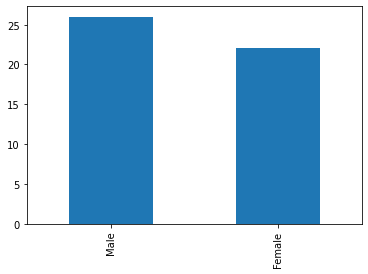

In [13]:
data_temp1 = data.loc[data["Education"]>4.4,"Gender"]
data_temp1=data_temp1.value_counts()
data_temp1.plot.bar()
plt.show()

### Podela zaposlenih prema stepenu obrazovanaj na viisoko, srednje i niko obrazovanje

Broj viskoko obrazovanih: 
446
Broj srednje obrazovanih: 
1470
Broj nisko obrazovanih: 
170


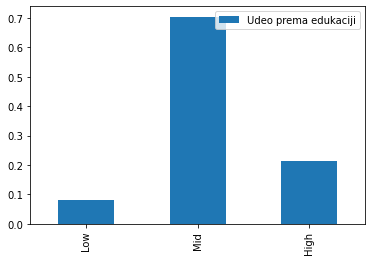

In [14]:
# visoko obrazovani - 4, 5 stepen
# srednje obrazovani - 3, 2
# nisko obrazovani - 1


education_high_value = (data["Education"] > 3).value_counts()
education_mid_value = ((data["Education"] >= 2) & (data["Education"]) <= 3).value_counts()
education_low_value = (data["Education"] <= 1).value_counts()


high = education_high_value[True]
print("Broj viskoko obrazovanih: ")
print(high)
mid = education_mid_value[True]
print("Broj srednje obrazovanih: ")
print(mid)
low = education_low_value[True]
print("Broj nisko obrazovanih: ")
print(low)

P_Rezultat = pd.DataFrame([low, mid, high]/(low + mid + high))
P_Rezultat.columns=["Udeo prema edukaciji"]
P_Rezultat.index = ["Low", "Mid", "High"]
P_Rezultat.plot.bar()
plt.show()

Broj viskoko placenih: 
556
Broj srednje placenih: 
1470
Broj nisko placenih: 
543


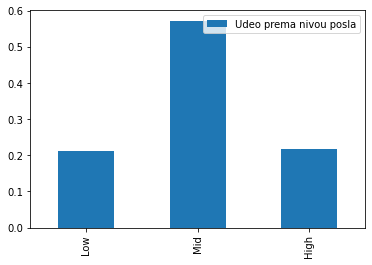

In [15]:
education_high_value = (data["MonthlyIncome"] > 6000).value_counts()
education_mid_value = ((data["MonthlyIncome"] >= 4001) & (data["MonthlyIncome"]) <= 6001).value_counts()
education_low_value = (data["MonthlyIncome"] <= 4000).value_counts()


high = education_high_value[True]
print("Broj viskoko placenih: ")
print(high)
mid = education_mid_value[True]
print("Broj srednje placenih: ")
print(mid)
low = education_low_value[True]
print("Broj nisko placenih: ")
print(low)

P_Rezultat = pd.DataFrame([low, mid, high]/(low + mid + high))
P_Rezultat.columns=["Udeo prema nivou posla"]
P_Rezultat.index = ["Low", "Mid", "High"]
P_Rezultat.plot.bar()
plt.show()

### Linearna regresija

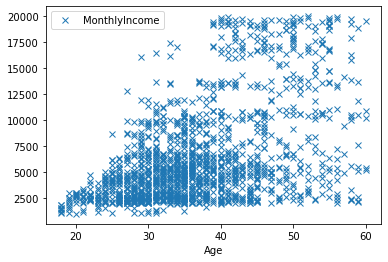

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     483.8
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           6.67e-93
Time:                        15:18:29   Log-Likelihood:                -5127.9
No. Observations:                1470   AIC:                         1.026e+04
Df Residuals:                    1468   BIC:                         1.027e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        30.6417      0.353     86.908

In [16]:
df = pd.read_csv('HR-Employee-Attrition.csv')   # morala sam ponovo da ucitam podate u suprotnom  ne radi
df.plot('Age', 'MonthlyIncome', style='x')
plt.show()

Regresija= sm.ols('Age ~ MonthlyIncome', df).fit()
print(Regresija.summary())

### Visestruka regresija

In [17]:
df = pd.read_csv('HR-Employee-Attrition.csv') 
Rez= sm.ols('Age ~ MonthlyIncome + MonthlyRate ', df).fit()
print(Rez.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     241.9
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           1.65e-91
Time:                        15:18:29   Log-Likelihood:                -5127.7
No. Observations:                1470   AIC:                         1.026e+04
Df Residuals:                    1467   BIC:                         1.028e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        30.4493      0.538     56.602

### Polinomska regresija

In [18]:
attributes = ['MonthlyIncome', 'MonthlyRate']
df = pd.read_csv('HR-Employee-Attrition.csv', usecols=attributes)
df.columns = ['MonthlyIncome', 'MonthlyRate']
df.head()
df.describe()

,MonthlyIncome,MonthlyRate
count,1470.000000,1470.000000
mean,6502.931293,14313.103401
std,4707.956783,7117.786044
min,1009.000000,2094.000000
25%,2911.000000,8047.000000
50%,4919.000000,14235.500000
75%,8379.000000,20461.500000
max,19999.000000,26999.000000


### Koeficijent korelacije

In [19]:
data.cov()['MonthlyIncome']['Age']/(data.std()['MonthlyIncome']*data.std()['Age'])

0.4978545669265802

### Medijana, standardna devijacija, aritmeticka sredina, matrica kovarijanse

In [20]:
#Medijana, standardna devijacija, aritmeticka sredina, matrica kovarijanse
atributi = ['Age','Education','EmployeeNumber', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany']
data = pd.read_csv("HR-Employee-Attrition.csv", usecols=atributi)
data.head()

#Medijana

med_Ratings = data['Education'].median()
med_Reviews = data['MonthlyIncome'].median()


#Standardna devijacija

std_Ratings = data['Education'].std()
std_Reviews = data['MonthlyIncome'].std()


#Aritmeticka sredina

sr_vr_Ratings = data['Education'].mean()
sr_vr_Reviews = data['MonthlyIncome'].mean()


print("Ratings")
print("Medijana:")
print(med_Ratings)
print("Standardna devijacija:")
print(std_Ratings)
print("Aritmeticka sredina")
print(sr_vr_Ratings)
print("------------------------")
print("Reviews")
print("Medijana:")
print(med_Reviews)
print("Standardna devijacija:")
print(std_Reviews)
print("Aritmeticka sredina")
print(sr_vr_Reviews)

print("MATRICA KOVARIJANSE:")
print(data.cov())

Ratings
Medijana:
3.0
Standardna devijacija:
1.0241649445978729
Aritmeticka sredina
2.912925170068027
------------------------
Reviews
Medijana:
4919.0
Standardna devijacija:
4707.956783097995
Aritmeticka sredina
6502.931292517007
MATRICA KOVARIJANSE:
                            Age   Education  EmployeeNumber     JobLevel  \
Age                   83.455049    1.946390      -55.797199     5.153276   
Education              1.946390    1.048914       25.939251     0.115170   
EmployeeNumber       -55.797199   25.939251   362433.299749   -12.341279   
JobLevel               5.153276    0.115170      -12.341279     1.225316   
MonthlyIncome      21412.198982  457.874204   -42028.530023  4952.416922   
MonthlyRate         1823.988823 -190.148240    54198.679015   311.714963   
TotalWorkingYears     48.361684    1.181612      -67.289749     6.737044   
YearsAtCompany        17.423359    0.433659      -41.458396     3.626435   

                   MonthlyIncome   MonthlyRate  TotalWorkingYea

In [21]:
data.describe()

,Age,Education,EmployeeNumber,JobLevel,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.912925,1024.865306,2.063946,6502.931293,14313.103401,11.279592,7.008163
std,9.135373,1.024165,602.024335,1.106940,4707.956783,7117.786044,7.780782,6.126525
min,18.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,0.000000
25%,30.000000,2.000000,491.250000,1.000000,2911.000000,8047.000000,6.000000,3.000000
50%,36.000000,3.000000,1020.500000,2.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,4.000000,1555.750000,3.000000,8379.000000,20461.500000,15.000000,9.000000
max,60.000000,5.000000,2068.000000,5.000000,19999.000000,26999.000000,40.000000,40.000000
